In [5]:
import numpy as np
from scipy import linalg as la
import sympy as sy
from matplotlib import pyplot as plt
import pandas as pd 

In [3]:
# Problem 1
def p1(A):
    sigma = la.svd(A)[1]
    a = sigma[0] / sigma[-1]
    return a



In [5]:
A = np.random.rand(6, 6)

np.allclose(p1(A), np.linalg.cond(A))


True

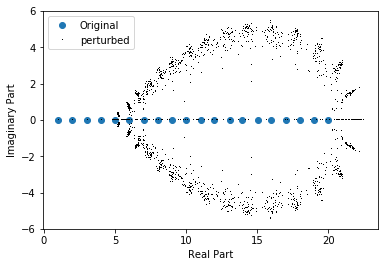

 absolute condition number is 3.29808936991538e-9
 relative condition number is 2276318313.88549


In [15]:
#Problem 2
x, i = sy.symbols('x i')
w = sy.poly_from_expr(sy.product(x-i, (i, 1, 20)))[0]
w_coeffs = np.array(w.all_coeffs())
roots = np.roots(np.poly1d(w_coeffs))
plt.plot(roots, np.zeros(20), 'o', label = "Original")
list1 = []
list2 = []
for i in range (0,100):
    c = np.random.normal(1, 1e-10, 21)
    newcoeffs = w_coeffs * c
    newroots = np.roots(np.poly1d(newcoeffs))
    if i == 99:
        plt.plot(newroots.real, newroots.imag, 'k,', label = "perturbed") 
        plt.xlabel("Real Part")
        plt.ylabel("Imaginary Part")
        plt.legend()
    else:
        plt.plot(newroots.real, newroots.imag, 'k,') 
    h = newcoeffs - w_coeffs
    acn = la.norm(newroots - roots, np.inf) / la.norm(h, np.inf)
    rcn = acn * la.norm(w_coeffs, np.inf) / la.norm(roots, np.inf) 
    list1 = list1 + [acn]
    list2 = list2 + [rcn]
plt.show()
print(" absolute condition number is", np.mean(list1))
print(" relative condition number is", np.mean(list2))

In [3]:
#Problem 3
def p3(A):
    real = np.random.normal(0, 1e-10, len(A))
    imag = np.random.normal(0, 1e-10, len(A))
    H = real + 1j*imag
    A_val = la.eigvals(A)
    eig_val = la.eigvals(A+H)
    diff = A_val - eig_val
    acn = (la.norm(diff, 2)) / (la.norm(H, 2))
    rcn = acn * (la.norm(A, 2)) / (la.norm(diff, 2))
    return acn, rcn



In [7]:
A = np.random.rand(5, 5)
p3(A)

(5429178446.586388, 10088183386.726263)

In [10]:
#Problem 4
def p4(bounds, res=200):  
    x_min, x_max, y_min, y_max = bounds
    x = np.linspace(x_min, x_max, res)
    y = np.linspace(y_min, y_max, res)
    condition = np.zeros((res, res))
    for i in range(res):
        for j in range(res):
            A = np.array([[1, x[i]], [y[j], 1]])
            condition[i,j] = p3(A)[1]
    plt.pcolormesh(x, y, condition, cmap='gray_r')
    plt.show()
   

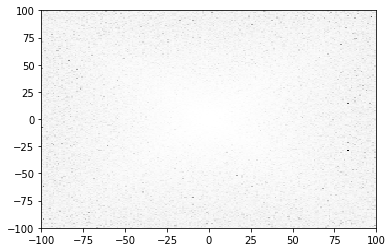

In [11]:
p4([-100,100,-100,100],200)

In [30]:
#Problem 5
def p5(n):
    xk, yk = np.load('stability_data.npy').T
    A = np.vander(xk, n + 1)
    ck_1 = la.inv(A.T @ A) @ A.T @ yk
    error_1 = np.linalg.norm(A @ ck_1 - yk)
    Q , R = la.qr(A, mode='economic')
    ck_2 = la.solve_triangular(R, Q.T @ yk)
    err_2 = np.linalg.norm(A @ ck_2 - yk)
    plt.plot(xk, yk)
    plt.plot(xk, np.polyval(ck_1, xk), label="Normal Equations")
    plt.plot(xk, np.polyval(ck_2, xk), label = "QR Solver")
    plt.legend()

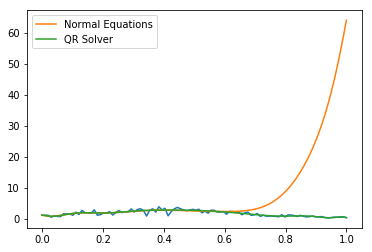

In [31]:
p5(14)

In [55]:
#Problem 6
from math import sqrt
import math
def p6():
    grid = np.arange(5,51,5)
    x = sy.Symbol('x')
    err=[]
    for n in grid:
        true = float(sy.integrate(x**n * sy.exp(x - 1), (x, 0, 1)))
        estimate = float((-1)**n * sy.subfactorial(n) + (-1)**(n + 1) * sy.factorial(n) / math.e)
        err.append(abs(estimate - true) / abs(true)) 
    plt.plot(ngrid, np.log(np.array(err)))
    plt.show()

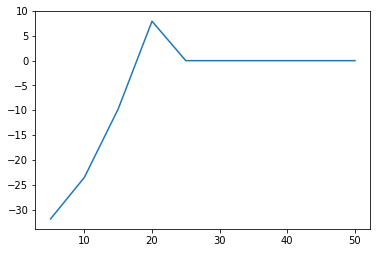

In [56]:
p6()